In [ ]:
import sys
import pandas as pd
import numpy as np
import IPython
from IPython.display import display

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-v0_8')   # The 'seaborn' style is deprecated

print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"IPython {IPython.__version__}" )
print( f"Matplotlib {mpl.__version__}" )

Python 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
Pandas 2.2.2
NumPy 1.26.4
IPython 7.34.0
Matplotlib 3.7.1


#Import data

###Cause of Death

In [ ]:
df_cause_of_death = pd.read_csv('https://raw.githubusercontent.com/imyajaii/dads5001-mini-project-01/refs/heads/main/dataset/cause_of_deaths.csv')
# Preview
df_cause_of_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

In [ ]:
df_cause_of_death.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [ ]:
df_cause_of_death['Code'].unique()

array(['AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'ARG', 'ARM',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN',
       'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD',
       'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV',
       'CUB', 'CYP', 'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU',
       'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FJI', 'FIN',
       'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRL', 'GRD',
       'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HUN', 'ISL',
       'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN',
       'JOR', 'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN',
       'LSO', 'LBR', 'LBY', 'LTU', 'LUX', 'MDG', 'MWI', 'MYS', 'MDV',
       'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MDA', 'MCO',
       'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL', 'NLD',
       'NZL', 'NIC',

In [ ]:
df_cause_of_death['Code'].unique()
lst = df_cause_of_death['Code'].unique()
len(lst)

204

###Continent

In [ ]:
df_continent = pd.read_csv('https://raw.githubusercontent.com/imyajaii/dads5001-mini-project-01/refs/heads/main/dataset/countryContinent.csv',encoding='latin-1') # Try 'latin-1' encoding

# Preview
df_continent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          249 non-null    object 
 1   code_2           248 non-null    object 
 2   code_3           249 non-null    object 
 3   country_code     249 non-null    int64  
 4   iso_3166_2       249 non-null    object 
 5   continent        240 non-null    object 
 6   sub_region       240 non-null    object 
 7   region_code      240 non-null    float64
 8   sub_region_code  240 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 17.6+ KB


###World Population

In [ ]:
df_population = pd.read_csv('https://raw.githubusercontent.com/imyajaii/dads5001-mini-project-01/refs/heads/main/dataset/World-population-by-countries-dataset.csv')

# Preview
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 64 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Country Code  266 non-null    object 
 2   1960          264 non-null    float64
 3   1961          264 non-null    float64
 4   1962          264 non-null    float64
 5   1963          264 non-null    float64
 6   1964          264 non-null    float64
 7   1965          264 non-null    float64
 8   1966          264 non-null    float64
 9   1967          264 non-null    float64
 10  1968          264 non-null    float64
 11  1969          264 non-null    float64
 12  1970          264 non-null    float64
 13  1971          264 non-null    float64
 14  1972          264 non-null    float64
 15  1973          264 non-null    float64
 16  1974          264 non-null    float64
 17  1975          264 non-null    float64
 18  1976          264 non-null    

#Cleansing

##World Population

### Drop unnecessary column

In [ ]:
df_population.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0
1,Africa Eastern and Southern,AFE,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0
2,Afghanistan,AFG,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0
3,Africa Western and Central,AFW,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0
4,Angola,AGO,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0


In [ ]:
# prompt: drop column 1960 - 1989 , 2020 , 2021 of df_population

columns_to_drop = [str(year) for year in range(1960, 1990)] + ['2020', '2021']
df_population = df_population.drop(columns=columns_to_drop)
df_population


,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,62152.0,64623.0,68240.0,72495.0,76705.0,80324.0,83211.0,85450.0,...,101665.0,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0
1,Africa Eastern and Southern,AFE,304648010.0,313394693.0,322270073.0,331265579.0,340379934.0,349605660.0,358953595.0,368440591.0,...,518468229.0,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0
2,Afghanistan,AFG,12412311.0,13299016.0,14485543.0,15816601.0,17075728.0,18110662.0,18853444.0,19357126.0,...,29185511.0,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0
3,Africa Western and Central,AFW,204803865.0,210332267.0,215976366.0,221754806.0,227692136.0,233807627.0,240114179.0,246613750.0,...,350556886.0,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0
4,Angola,AGO,11848385.0,12248901.0,12657361.0,13075044.0,13503753.0,13945205.0,14400722.0,14871572.0,...,23356247.0,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,1862000.0,1898000.0,1932000.0,1965000.0,1997000.0,2029000.0,2059000.0,2086000.0,...,1775680.0,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0
262,"Yemen, Rep.",YEM,11709987.0,12302127.0,12954157.0,13634082.0,14297617.0,14913313.0,15469274.0,15975676.0,...,23154854.0,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0
263,South Africa,ZAF,36800507.0,37718952.0,38672611.0,39633754.0,40564061.0,41435761.0,42241007.0,42987456.0,...,51216967.0,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0
264,Zambia,ZMB,8036849.0,8246662.0,8451346.0,8656484.0,8869745.0,9096608.0,9339740.0,9597610.0,...,13605986.0,14023199.0,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0


###Reshape data of Pupulation

In [ ]:
# prompt: i want to reshape  df_population of column 1990 - 2019 into row of each of Column Country Code (the new name of column is Population) keep column Country Name

df_population_melted = df_population.melt(id_vars=['Country Name', 'Country Code'],
                                         var_name='Year',
                                         value_name='Population')

df_population_melted.head()


,Country Name,Country Code,Year,Population
0,Aruba,ABW,1990,62152.0
1,Africa Eastern and Southern,AFE,1990,304648010.0
2,Afghanistan,AFG,1990,12412311.0
3,Africa Western and Central,AFW,1990,204803865.0
4,Angola,AGO,1990,11848385.0


In [ ]:
df_population_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7980 entries, 0 to 7979
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  7980 non-null   object 
 1   Country Code  7980 non-null   object 
 2   Year          7980 non-null   object 
 3   Population    7939 non-null   float64
dtypes: float64(1), object(3)
memory usage: 249.5+ KB


##Continent

###Drop unnecessary column of continent

In [ ]:
df_continent = df_continent.drop(['country', 'code_2', 'country_code', 'iso_3166_2', 'region_code', 'sub_region_code'], axis=1)


In [ ]:
df_continent.info()
df_continent.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   code_3      249 non-null    object
 1   continent   240 non-null    object
 2   sub_region  240 non-null    object
dtypes: object(3)
memory usage: 6.0+ KB


,code_3,continent,sub_region
0,AFG,Asia,Southern Asia
1,ALA,Europe,Northern Europe
2,ALB,Europe,Southern Europe
3,DZA,Africa,Northern Africa
4,ASM,Oceania,Polynesia


##Cause of Death

###Merge data by Country code 3 digits

In [ ]:
# prompt: check if the column Code of df_cause_of_death was all in column code_3 of df_cintinent

# Convert both columns to sets for efficient comparison
cause_of_death_codes = set(df_cause_of_death['Code'].unique())
continent_codes = set(df_continent['code_3'].unique())

# Check if all codes in df_cause_of_death are present in df_continent
all_codes_present = cause_of_death_codes.issubset(continent_codes)

print(f"Are all 'Code' values from df_cause_of_death present in 'code_3' of df_continent? {all_codes_present}")


Are all 'Code' values from df_cause_of_death present in 'code_3' of df_continent? True


In [ ]:
df_join1 = pd.merge( df_cause_of_death, df_continent, left_on='Code', right_on='code_3', how='left' )
df_join1.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,code_3,continent,sub_region
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2054,4154,5945,2673,5005,323,2985,AFG,Asia,Southern Asia
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2119,4472,6050,2728,5120,332,3092,AFG,Asia,Southern Asia
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2404,5106,6223,2830,5335,360,3325,AFG,Asia,Southern Asia
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2797,5681,6445,2943,5568,396,3601,AFG,Asia,Southern Asia
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,3038,6001,6664,3027,5739,420,3816,AFG,Asia,Southern Asia


In [ ]:
df_join1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

In [ ]:
df_join1 = df_join1.drop(['code_3'], axis=1) # Drop duplicate column
df_join1.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,continent,sub_region
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,338,2054,4154,5945,2673,5005,323,2985,Asia,Southern Asia
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,351,2119,4472,6050,2728,5120,332,3092,Asia,Southern Asia
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,386,2404,5106,6223,2830,5335,360,3325,Asia,Southern Asia
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,425,2797,5681,6445,2943,5568,396,3601,Asia,Southern Asia
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,451,3038,6001,6664,3027,5739,420,3816,Asia,Southern Asia


In [ ]:
# prompt: move column continent and sub_region into next of column Code

cols = list(df_join1.columns)
continent_index = cols.index('continent')
sub_region_index = cols.index('sub_region')
code_index = cols.index('Code')

# Move 'continent' and 'sub_region' columns to the right of 'Code'
new_cols = cols[:code_index+1] + [cols[continent_index]] + [cols[sub_region_index]] + cols[code_index+1:continent_index] + cols[continent_index+1:sub_region_index] + cols[sub_region_index+1:]
df_join1 = df_join1[new_cols]

df_join1.head()


,Country/Territory,Code,continent,sub_region,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,Asia,Southern Asia,1990,2159,1116,371,2087,93,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,Asia,Southern Asia,1991,2218,1136,374,2153,189,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,Asia,Southern Asia,1992,2475,1162,378,2441,239,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,Asia,Southern Asia,1993,2812,1187,384,2837,108,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,Asia,Southern Asia,1994,3027,1211,391,3081,211,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


###Check Invalid Country

In [ ]:
join1_codes = set(df_join1['Code'].unique())
population_codes = set(df_population_melted['Country Code'].unique())

codes_not_in_population = join1_codes - population_codes

print("Codes in df_join1['Code'] that are not in df_population['Country Code']:\n", codes_not_in_population)

Codes in df_join1['Code'] that are not in df_population['Country Code']:
 {'TKL', 'COK', 'TWN', 'NIU'}


In [ ]:
join1 = set(df_join1['Code'].unique())
population = set(df_population_melted['Country Code'].unique())

# Check if all codes in df_cause_of_death are present in df_continent
all_codes_present = join1.issubset(population)

print(f"Are all 'Code' values from df_cause_of_death present in 'code_3' of df_continent? {all_codes_present}")

Are all 'Code' values from df_cause_of_death present in 'code_3' of df_continent? False


####Import Taiwan

In [ ]:
df_taiwan = pd.read_csv('https://raw.githubusercontent.com/imyajaii/dads5001-mini-project-01/refs/heads/develop/dataset/taiwan-population.csv')
# Preview
df_taiwan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              151 non-null    object 
 1    Population       151 non-null    int64  
 2    Annual % Change  150 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.7+ KB


In [ ]:
df_taiwan.head()

,date,Population,Annual % Change
0,31/12/1950,7623130,NaN
1,31/12/1951,7934689,4.09
2,31/12/1952,8251039,3.99
3,31/12/1953,8572131,3.89
4,31/12/1954,8897776,3.80


In [ ]:
# prompt: change date of column date into year
# Assuming 'df_taiwan' is your DataFrame and 'date' is the column containing dates
df_taiwan['Year'] = pd.to_datetime(df_taiwan['date']).dt.year
df_taiwan

<ipython-input-249-22807dbae3d2>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_taiwan['Year'] = pd.to_datetime(df_taiwan['date']).dt.year


,date,Population,Annual % Change,Year
0,31/12/1950,7623130,NaN,1950
1,31/12/1951,7934689,4.09,1951
2,31/12/1952,8251039,3.99,1952
3,31/12/1953,8572131,3.89,1953
4,31/12/1954,8897776,3.80,1954
...,...,...,...,...
146,31/12/2096,15590180,-0.62,2096
147,31/12/2097,15497260,-0.60,2097
148,31/12/2098,15408434,-0.57,2098
149,31/12/2099,15323545,-0.55,2099


In [ ]:
# prompt: create column Country in first column all data was Taiwan , column Code in second column all data was TWN and move column Year into third column

# Create new columns 'Country' and 'Code'
df_taiwan['Country'] = 'Taiwan'
df_taiwan['Code'] = 'TWN'

# Get the list of column names
cols = list(df_taiwan.columns)

# Find the index of the 'Year' column
year_index = cols.index('Year')

# Remove 'Year' from its original position
cols.pop(year_index)

# Insert 'Year' at the third position (index 2)
cols.insert(2, 'Year')

# Reorder the DataFrame columns based on the new list
df_taiwan = df_taiwan[cols]

df_taiwan.head()


,date,Population,Year,Annual % Change,Country,Code
0,31/12/1950,7623130,1950,NaN,Taiwan,TWN
1,31/12/1951,7934689,1951,4.09,Taiwan,TWN
2,31/12/1952,8251039,1952,3.99,Taiwan,TWN
3,31/12/1953,8572131,1953,3.89,Taiwan,TWN
4,31/12/1954,8897776,1954,3.80,Taiwan,TWN


In [ ]:
# prompt: drop column date , Annual % Change

df_taiwan = df_taiwan.drop(['date', ' Annual % Change'], axis=1)


In [ ]:
df_taiwan.head()

,Population,Year,Country,Code
0,7623130,1950,Taiwan,TWN
1,7934689,1951,Taiwan,TWN
2,8251039,1952,Taiwan,TWN
3,8572131,1953,Taiwan,TWN
4,8897776,1954,Taiwan,TWN


In [ ]:
df_taiwan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0    Population  151 non-null    int64 
 1   Year         151 non-null    int32 
 2   Country      151 non-null    object
 3   Code         151 non-null    object
dtypes: int32(1), int64(1), object(2)
memory usage: 4.3+ KB


In [ ]:
# prompt: change name of column

df_taiwan = df_taiwan.rename(columns={' Population': 'Population', 'Country': 'Country Name', 'Code': 'Country Code'})
df_taiwan.head()


,Population,Year,Country Name,Country Code
0,7623130,1950,Taiwan,TWN
1,7934689,1951,Taiwan,TWN
2,8251039,1952,Taiwan,TWN
3,8572131,1953,Taiwan,TWN
4,8897776,1954,Taiwan,TWN


In [ ]:
# prompt: move column in this way Country Name , Country Code , Year , Population

new_order = ['Country Name', 'Country Code', 'Year', 'Population']
df_taiwan = df_taiwan[new_order]
df_taiwan.head()


,Country Name,Country Code,Year,Population
0,Taiwan,TWN,1950,7623130
1,Taiwan,TWN,1951,7934689
2,Taiwan,TWN,1952,8251039
3,Taiwan,TWN,1953,8572131
4,Taiwan,TWN,1954,8897776


In [ ]:
df_taiwan

,Country Name,Country Code,Year,Population
0,Taiwan,TWN,1950,7623130
1,Taiwan,TWN,1951,7934689
2,Taiwan,TWN,1952,8251039
3,Taiwan,TWN,1953,8572131
4,Taiwan,TWN,1954,8897776
...,...,...,...,...
146,Taiwan,TWN,2096,15590180
147,Taiwan,TWN,2097,15497260
148,Taiwan,TWN,2098,15408434
149,Taiwan,TWN,2099,15323545


In [ ]:
# prompt: drop row that was Year 1950 - 1989 , 2020 - 2100 of df_taiwan

years_to_drop = list(range(1950, 1990)) + list(range(2020, 2101))
df_taiwan = df_taiwan[~df_taiwan['Year'].isin(years_to_drop)]


In [ ]:
df_taiwan

,Country Name,Country Code,Year,Population
40,Taiwan,TWN,1990,20586174
41,Taiwan,TWN,1991,20770620
42,Taiwan,TWN,1992,20952222
43,Taiwan,TWN,1993,21125717
44,Taiwan,TWN,1994,21293437
45,Taiwan,TWN,1995,21455813
46,Taiwan,TWN,1996,21612429
47,Taiwan,TWN,1997,21764843
48,Taiwan,TWN,1998,21913672
49,Taiwan,TWN,1999,22057214


####Join missing TWN

In [ ]:
# prompt: add row of df_taiwan in to df_population_melted

df_population_melted = pd.concat([df_population_melted, df_taiwan], ignore_index=True)
df_population_melted


,Country Name,Country Code,Year,Population
0,Aruba,ABW,1990,62152.0
1,Africa Eastern and Southern,AFE,1990,304648010.0
2,Afghanistan,AFG,1990,12412311.0
3,Africa Western and Central,AFW,1990,204803865.0
4,Angola,AGO,1990,11848385.0
...,...,...,...,...
8005,Taiwan,TWN,2015,23512136.0
8006,Taiwan,TWN,2016,23594471.0
8007,Taiwan,TWN,2017,23665024.0
8008,Taiwan,TWN,2018,23726185.0


In [ ]:
df_population_melted

,Country Name,Country Code,Year,Population
0,Aruba,ABW,1990,62152.0
1,Africa Eastern and Southern,AFE,1990,304648010.0
2,Afghanistan,AFG,1990,12412311.0
3,Africa Western and Central,AFW,1990,204803865.0
4,Angola,AGO,1990,11848385.0
...,...,...,...,...
8005,Taiwan,TWN,2015,23512136.0
8006,Taiwan,TWN,2016,23594471.0
8007,Taiwan,TWN,2017,23665024.0
8008,Taiwan,TWN,2018,23726185.0


###Check invalid after

In [ ]:
# prompt: show column Code in df_join1 was not in column Country Code in df_population

join1_codes = set(df_join1['Code'].unique())
population_codes = set(df_population_melted['Country Code'].unique())

codes_not_in_population = join1_codes - population_codes

print("Codes in df_join1['Code'] that are not in df_population['Country Code']:\n", codes_not_in_population)


Codes in df_join1['Code'] that are not in df_population['Country Code']:
 {'TKL', 'COK', 'NIU'}


In [ ]:
join1_codes = set(df_join1['Year'].unique())
population_codes = set(df_population_melted['Year'].unique())

codes_not_in_population = join1_codes - population_codes

print("Codes in df_join1['Year'] that are not in df_population['Year']:\n", codes_not_in_population)

Codes in df_join1['Year'] that are not in df_population['Year']:
 set()


In [ ]:
# prompt: check type of Year in df_join1

print(df_join1['Year'].dtype)


int64


In [ ]:
df_population_melted['Year'].unique()

array(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019], dtype=object)

In [ ]:
# Match type of Year before Merge

df_population_melted['Year'] = df_population_melted['Year'].astype('int64')


In [ ]:
df_population_melted[df_population_melted['Population'].isnull()]

,Country Name,Country Code,Year,Population
110,Not classified,INX,1990,NaN
376,Not classified,INX,1991,NaN
642,Not classified,INX,1992,NaN
659,Kuwait,KWT,1992,NaN
908,Not classified,INX,1993,NaN
925,Kuwait,KWT,1993,NaN
1174,Not classified,INX,1994,NaN
1191,Kuwait,KWT,1994,NaN
1440,Not classified,INX,1995,NaN
1706,Not classified,INX,1996,NaN


##Creat Main Table

###Merge all data to be main Table

In [ ]:
# Merge on multiple keys: Inner join

# Alternative 1
#pd.merge(df_join1, df_population_melted, on=['StudentID', 'CourseID'], how='inner')

# Alternative 2
df_Main_data = pd.merge(df_join1, df_population_melted, left_on=['Code', 'Year'], right_on=['Country Code', 'Year'], how='outer')
df_Main_data

,Country/Territory,Code,continent,sub_region,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,...,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Country Name,Country Code,Population
0,NaN,NaN,NaN,NaN,1990,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aruba,ABW,62152.0
1,NaN,NaN,NaN,NaN,1991,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aruba,ABW,64623.0
2,NaN,NaN,NaN,NaN,1992,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aruba,ABW,68240.0
3,NaN,NaN,NaN,NaN,1993,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aruba,ABW,72495.0
4,NaN,NaN,NaN,NaN,1994,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aruba,ABW,76705.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,Zimbabwe,ZWE,Africa,Eastern Africa,2015,1439.0,754.0,215.0,3019.0,2518.0,...,2990.0,2373.0,2751.0,1956.0,4202.0,632.0,146.0,Zimbabwe,ZWE,13814642.0
8096,Zimbabwe,ZWE,Africa,Eastern Africa,2016,1457.0,767.0,219.0,3056.0,2050.0,...,3027.0,2436.0,2788.0,1962.0,4264.0,648.0,146.0,Zimbabwe,ZWE,14030338.0
8097,Zimbabwe,ZWE,Africa,Eastern Africa,2017,1460.0,781.0,223.0,2990.0,2116.0,...,2962.0,2473.0,2818.0,2007.0,4342.0,654.0,144.0,Zimbabwe,ZWE,14236599.0
8098,Zimbabwe,ZWE,Africa,Eastern Africa,2018,1450.0,795.0,227.0,2918.0,2088.0,...,2890.0,2509.0,2849.0,2030.0,4377.0,657.0,139.0,Zimbabwe,ZWE,14438812.0


###Drop Null and Duplicate columns

In [ ]:
# prompt: drop row in column Code that was NaN

df_Main_data = df_Main_data.dropna(subset=['Code'])
df_Main_data = df_Main_data.drop(['Country Name', 'Country Code'], axis=1)

In [ ]:
df_Main_data

,Country/Territory,Code,continent,sub_region,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Population
60,Afghanistan,AFG,Asia,Southern Asia,1990,2159.0,1116.0,371.0,2087.0,93.0,...,3709.0,338.0,2054.0,4154.0,5945.0,2673.0,5005.0,323.0,2985.0,12412311.0
61,Afghanistan,AFG,Asia,Southern Asia,1991,2218.0,1136.0,374.0,2153.0,189.0,...,3724.0,351.0,2119.0,4472.0,6050.0,2728.0,5120.0,332.0,3092.0,13299016.0
62,Afghanistan,AFG,Asia,Southern Asia,1992,2475.0,1162.0,378.0,2441.0,239.0,...,3776.0,386.0,2404.0,5106.0,6223.0,2830.0,5335.0,360.0,3325.0,14485543.0
63,Afghanistan,AFG,Asia,Southern Asia,1993,2812.0,1187.0,384.0,2837.0,108.0,...,3862.0,425.0,2797.0,5681.0,6445.0,2943.0,5568.0,396.0,3601.0,15816601.0
64,Afghanistan,AFG,Asia,Southern Asia,1994,3027.0,1211.0,391.0,3081.0,211.0,...,3932.0,451.0,3038.0,6001.0,6664.0,3027.0,5739.0,420.0,3816.0,17075728.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,Zimbabwe,ZWE,Africa,Eastern Africa,2015,1439.0,754.0,215.0,3019.0,2518.0,...,2108.0,381.0,2990.0,2373.0,2751.0,1956.0,4202.0,632.0,146.0,13814642.0
8096,Zimbabwe,ZWE,Africa,Eastern Africa,2016,1457.0,767.0,219.0,3056.0,2050.0,...,2160.0,393.0,3027.0,2436.0,2788.0,1962.0,4264.0,648.0,146.0,14030338.0
8097,Zimbabwe,ZWE,Africa,Eastern Africa,2017,1460.0,781.0,223.0,2990.0,2116.0,...,2196.0,398.0,2962.0,2473.0,2818.0,2007.0,4342.0,654.0,144.0,14236599.0
8098,Zimbabwe,ZWE,Africa,Eastern Africa,2018,1450.0,795.0,227.0,2918.0,2088.0,...,2240.0,400.0,2890.0,2509.0,2849.0,2030.0,4377.0,657.0,139.0,14438812.0


In [ ]:
# prompt: show null data in column Population

df_Main_data[df_Main_data['Population'].isnull()]['Code'].unique()


array(['COK', 'ERI', 'KWT', 'NIU', 'TKL'], dtype=object)

In [ ]:
# prompt: list of name of column

column_names = df_Main_data.columns.tolist()
print(column_names)

['Country/Territory', 'Code', 'continent', 'sub_region', 'Year', 'Meningitis', "Alzheimer's Disease and Other Dementias", "Parkinson's Disease", 'Nutritional Deficiencies', 'Malaria', 'Drowning', 'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS', 'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases', 'Lower Respiratory Infections', 'Neonatal Disorders', 'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature', 'Diarrheal Diseases', 'Environmental Heat and Cold Exposure', 'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus', 'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition', 'Road Injuries', 'Chronic Respiratory Diseases', 'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases', 'Fire, Heat, and Hot Substances', 'Acute Hepatitis', 'Population']


###Rename Columns

In [ ]:
#change name of column of df_Main_data replace blank with "_" and Capitalized

df_Main_data = df_Main_data.rename(columns={'Country/Territory': 'Country', 'continent': 'Continent', 'sub_region': 'Sub_region', "Alzheimer's Disease and Other Dementias": 'Alzheimers_Disease_and_Other_Dementias', "Parkinson's Disease": 'Parkinsons_Disease', 'Nutritional Deficiencies': 'Nutritional_Deficiencies', 'Interpersonal Violence': 'Interpersonal_Violence', 'Maternal Disorders': 'Maternal_Disorders', 'HIV/AIDS': 'HIV', 'Drug Use Disorders': 'Drug_Use_Disorders', 'Cardiovascular Diseases': 'Cardiovascular_Diseases', 'Lower Respiratory Infections': 'Lower_Respiratory_Infections', 'Neonatal Disorders': 'Neonatal_Disorders', 'Alcohol Use Disorders': 'Alcohol_Use_Disorders', 'Self-harm': 'Self_harm', 'Exposure to Forces of Nature': 'Exposure_to_Forces_of_Nature', 'Diarrheal Diseases': 'Diarrheal_Diseases', 'Environmental Heat and Cold Exposure': 'Environmental_Heat_and_Cold_Exposure', 'Conflict and Terrorism': 'Conflict_and_Terrorism', 'Diabetes Mellitus': 'Diabetes_Mellitus', 'Chronic Kidney Disease': 'Chronic_Kidney_Disease', 'Protein-Energy Malnutrition': 'Protein_Energy_Malnutrition', 'Road Injuries': 'Road_Injuries', 'Chronic Respiratory Diseases': 'Chronic_Respiratory_Diseases', 'Cirrhosis and Other Chronic Liver Diseases': 'Cirrhosis_and_Other_Chronic_Liver_Diseases', 'Digestive Diseases': 'Digestive_Diseases', 'Fire, Heat, and Hot Substances': 'Fire_Heat_and_Hot_Substances', 'Acute Hepatitis': 'Acute_Hepatitis'})

In [ ]:
df_Main_data.head()

,Country,Code,Continent,Sub_region,Year,Meningitis,Alzheimers_Disease_and_Other_Dementias,Parkinsons_Disease,Nutritional_Deficiencies,Malaria,...,Chronic_Kidney_Disease,Poisonings,Protein_Energy_Malnutrition,Road_Injuries,Chronic_Respiratory_Diseases,Cirrhosis_and_Other_Chronic_Liver_Diseases,Digestive_Diseases,Fire_Heat_and_Hot_Substances,Acute_Hepatitis,Population
60,Afghanistan,AFG,Asia,Southern Asia,1990,2159.0,1116.0,371.0,2087.0,93.0,...,3709.0,338.0,2054.0,4154.0,5945.0,2673.0,5005.0,323.0,2985.0,12412311.0
61,Afghanistan,AFG,Asia,Southern Asia,1991,2218.0,1136.0,374.0,2153.0,189.0,...,3724.0,351.0,2119.0,4472.0,6050.0,2728.0,5120.0,332.0,3092.0,13299016.0
62,Afghanistan,AFG,Asia,Southern Asia,1992,2475.0,1162.0,378.0,2441.0,239.0,...,3776.0,386.0,2404.0,5106.0,6223.0,2830.0,5335.0,360.0,3325.0,14485543.0
63,Afghanistan,AFG,Asia,Southern Asia,1993,2812.0,1187.0,384.0,2837.0,108.0,...,3862.0,425.0,2797.0,5681.0,6445.0,2943.0,5568.0,396.0,3601.0,15816601.0
64,Afghanistan,AFG,Asia,Southern Asia,1994,3027.0,1211.0,391.0,3081.0,211.0,...,3932.0,451.0,3038.0,6001.0,6664.0,3027.0,5739.0,420.0,3816.0,17075728.0


In [ ]:
column_names = df_Main_data.columns.tolist()
print(column_names)

['Country', 'Code', 'Continent', 'Sub_region', 'Year', 'Meningitis', 'Alzheimers_Disease_and_Other_Dementias', 'Parkinsons_Disease', 'Nutritional_Deficiencies', 'Malaria', 'Drowning', 'Interpersonal_Violence', 'Maternal_Disorders', 'HIV', 'Drug_Use_Disorders', 'Tuberculosis', 'Cardiovascular_Diseases', 'Lower_Respiratory_Infections', 'Neonatal_Disorders', 'Alcohol_Use_Disorders', 'Self_harm', 'Exposure_to_Forces_of_Nature', 'Diarrheal_Diseases', 'Environmental_Heat_and_Cold_Exposure', 'Neoplasms', 'Conflict_and_Terrorism', 'Diabetes_Mellitus', 'Chronic_Kidney_Disease', 'Poisonings', 'Protein_Energy_Malnutrition', 'Road_Injuries', 'Chronic_Respiratory_Diseases', 'Cirrhosis_and_Other_Chronic_Liver_Diseases', 'Digestive_Diseases', 'Fire_Heat_and_Hot_Substances', 'Acute_Hepatitis', 'Population']


###Add Column Total amount of Death by Cause and Ratio of Death per Population

In [ ]:
# prompt: add column total_dead that sum from column Meningitis to column Acute_Hepatitis
#Use column_to_sum for represent all cause of death
columns_to_sum = ['Meningitis', 'Alzheimers_Disease_and_Other_Dementias', 'Parkinsons_Disease',
                  'Nutritional_Deficiencies', 'Malaria', 'Drowning', 'Interpersonal_Violence',
                  'Maternal_Disorders', 'HIV', 'Drug_Use_Disorders', 'Tuberculosis', 'Cardiovascular_Diseases',
                  'Lower_Respiratory_Infections', 'Neonatal_Disorders', 'Alcohol_Use_Disorders', 'Self_harm',
                  'Exposure_to_Forces_of_Nature', 'Diarrheal_Diseases', 'Environmental_Heat_and_Cold_Exposure',
                  'Neoplasms', 'Conflict_and_Terrorism', 'Diabetes_Mellitus', 'Chronic_Kidney_Disease',
                  'Poisonings', 'Protein_Energy_Malnutrition', 'Road_Injuries', 'Chronic_Respiratory_Diseases',
                  'Cirrhosis_and_Other_Chronic_Liver_Diseases', 'Digestive_Diseases', 'Fire_Heat_and_Hot_Substances', 'Acute_Hepatitis']

df_Main_data['Total_Dead'] = df_Main_data[columns_to_sum].sum(axis=1)


In [ ]:
df_Main_data

,Country,Code,Continent,Sub_region,Year,Meningitis,Alzheimers_Disease_and_Other_Dementias,Parkinsons_Disease,Nutritional_Deficiencies,Malaria,...,Poisonings,Protein_Energy_Malnutrition,Road_Injuries,Chronic_Respiratory_Diseases,Cirrhosis_and_Other_Chronic_Liver_Diseases,Digestive_Diseases,Fire_Heat_and_Hot_Substances,Acute_Hepatitis,Population,Total_Dead
60,Afghanistan,AFG,Asia,Southern Asia,1990,2159.0,1116.0,371.0,2087.0,93.0,...,338.0,2054.0,4154.0,5945.0,2673.0,5005.0,323.0,2985.0,12412311.0,147971.0
61,Afghanistan,AFG,Asia,Southern Asia,1991,2218.0,1136.0,374.0,2153.0,189.0,...,351.0,2119.0,4472.0,6050.0,2728.0,5120.0,332.0,3092.0,13299016.0,156844.0
62,Afghanistan,AFG,Asia,Southern Asia,1992,2475.0,1162.0,378.0,2441.0,239.0,...,386.0,2404.0,5106.0,6223.0,2830.0,5335.0,360.0,3325.0,14485543.0,169156.0
63,Afghanistan,AFG,Asia,Southern Asia,1993,2812.0,1187.0,384.0,2837.0,108.0,...,425.0,2797.0,5681.0,6445.0,2943.0,5568.0,396.0,3601.0,15816601.0,182230.0
64,Afghanistan,AFG,Asia,Southern Asia,1994,3027.0,1211.0,391.0,3081.0,211.0,...,451.0,3038.0,6001.0,6664.0,3027.0,5739.0,420.0,3816.0,17075728.0,194795.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,Zimbabwe,ZWE,Africa,Eastern Africa,2015,1439.0,754.0,215.0,3019.0,2518.0,...,381.0,2990.0,2373.0,2751.0,1956.0,4202.0,632.0,146.0,13814642.0,130080.0
8096,Zimbabwe,ZWE,Africa,Eastern Africa,2016,1457.0,767.0,219.0,3056.0,2050.0,...,393.0,3027.0,2436.0,2788.0,1962.0,4264.0,648.0,146.0,14030338.0,128274.0
8097,Zimbabwe,ZWE,Africa,Eastern Africa,2017,1460.0,781.0,223.0,2990.0,2116.0,...,398.0,2962.0,2473.0,2818.0,2007.0,4342.0,654.0,144.0,14236599.0,126515.0
8098,Zimbabwe,ZWE,Africa,Eastern Africa,2018,1450.0,795.0,227.0,2918.0,2088.0,...,400.0,2890.0,2509.0,2849.0,2030.0,4377.0,657.0,139.0,14438812.0,123506.0


In [ ]:
# prompt: move column Population in to last column

# Get a list of column names
cols = list(df_Main_data.columns)

# Find the index of the 'Population' column
population_index = cols.index('Population')

# Remove 'Population' from its original position
cols.pop(population_index)

# Append 'Population' to the end of the list
cols.append('Population')

# Reorder the DataFrame columns based on the new list
df_Main_data = df_Main_data[cols]

df_Main_data.head()


,Country,Code,Continent,Sub_region,Year,Meningitis,Alzheimers_Disease_and_Other_Dementias,Parkinsons_Disease,Nutritional_Deficiencies,Malaria,...,Poisonings,Protein_Energy_Malnutrition,Road_Injuries,Chronic_Respiratory_Diseases,Cirrhosis_and_Other_Chronic_Liver_Diseases,Digestive_Diseases,Fire_Heat_and_Hot_Substances,Acute_Hepatitis,Total_Dead,Population
60,Afghanistan,AFG,Asia,Southern Asia,1990,2159.0,1116.0,371.0,2087.0,93.0,...,338.0,2054.0,4154.0,5945.0,2673.0,5005.0,323.0,2985.0,147971.0,12412311.0
61,Afghanistan,AFG,Asia,Southern Asia,1991,2218.0,1136.0,374.0,2153.0,189.0,...,351.0,2119.0,4472.0,6050.0,2728.0,5120.0,332.0,3092.0,156844.0,13299016.0
62,Afghanistan,AFG,Asia,Southern Asia,1992,2475.0,1162.0,378.0,2441.0,239.0,...,386.0,2404.0,5106.0,6223.0,2830.0,5335.0,360.0,3325.0,169156.0,14485543.0
63,Afghanistan,AFG,Asia,Southern Asia,1993,2812.0,1187.0,384.0,2837.0,108.0,...,425.0,2797.0,5681.0,6445.0,2943.0,5568.0,396.0,3601.0,182230.0,15816601.0
64,Afghanistan,AFG,Asia,Southern Asia,1994,3027.0,1211.0,391.0,3081.0,211.0,...,451.0,3038.0,6001.0,6664.0,3027.0,5739.0,420.0,3816.0,194795.0,17075728.0


#Analyze

##**การวิเคราะห์การเสียชีวิตจากโรคต่างๆ ตั้งแต่ปี 1990 - 2019**

การเสียชีวิตจากโรคต่างๆ ทั่วโลกในช่วงปี 1990 - 2019 มีแนวโน้มเปลี่ยนแปลงไปตามปัจจัยหลายประการ เช่น ความก้าวหน้าทางการแพทย์ วิถีชีวิตของประชากร การพัฒนาสังคม และเศรษฐกิจ รวมถึงการเพิ่มขึ้นของจำนวนประชากรสูงอายุ ข้อมูลจากการวิเคราะห์นี้จะแสดงให้เห็นถึงสาเหตุหลักของการเสียชีวิตในแต่ละภูมิภาคทั่วโลก รวมถึงแนวโน้มของการเสียชีวิตจากโรคเรื้อรังที่เกี่ยวข้องกับปัจจัยเสี่ยงต่างๆ เช่น โรคหัวใจ มะเร็ง เบาหวาน และโรคทางเดินหายใจเรื้อรัง

In [ ]:
columns_to_sum = ['Meningitis', 'Alzheimers_Disease_and_Other_Dementias', 'Parkinsons_Disease',
                  'Nutritional_Deficiencies', 'Malaria', 'Drowning', 'Interpersonal_Violence',
                  'Maternal_Disorders', 'HIV', 'Drug_Use_Disorders', 'Tuberculosis', 'Cardiovascular_Diseases',
                  'Lower_Respiratory_Infections', 'Neonatal_Disorders', 'Alcohol_Use_Disorders', 'Self_harm',
                  'Exposure_to_Forces_of_Nature', 'Diarrheal_Diseases', 'Environmental_Heat_and_Cold_Exposure',
                  'Neoplasms', 'Conflict_and_Terrorism', 'Diabetes_Mellitus', 'Chronic_Kidney_Disease',
                  'Poisonings', 'Protein_Energy_Malnutrition', 'Road_Injuries', 'Chronic_Respiratory_Diseases',
                  'Cirrhosis_and_Other_Chronic_Liver_Diseases', 'Digestive_Diseases', 'Fire_Heat_and_Hot_Substances', 'Acute_Hepatitis']

column_sums = df_Main_data[columns_to_sum].sum().sort_values(ascending=False)


In [ ]:
first_plot = column_sums.sort_values(ascending=False).reset_index().rename(columns={'index':'Cause', 0:'Total'}).head(10)

###**การเสียชีวิตทั่วโลกตั้งแต่ปี 1990 - 2019**

จากข้อมูลที่นำมาวิเคราะห์แสดงให้เห็นว่าการเสียชีวิตจากโรคต่างๆ มีการเปลี่ยนแปลงอย่างชัดเจนในช่วง 30 ปีที่ผ่านมานับตั้งแต่ปี 1990 - 2019 กราฟด้านล่างแสดงจำนวนผู้เสียชีวิตจากโรคสำคัญทั่วโลก โดยโรคที่มีปริมาณเสียชีวิตสูงสุดในช่วงเวลาดังกล่าวประกอบไปด้วย:



1.   โรคหัวใจและหลอดเลือด(Cardiovascular_Diseases)
2.   เนื้องอก (Neoplasms)
3.   โรคระบบทางเดินหายใจเรื้อรัง (Chronic_Respiratory_Diseases)
4.   การติดเชื้อทางเดินหายใจส่วนล่าง (Lower_Respiratory_Infections)
5.   โรคในทารกแรกเกิด (Neonatal_Disorders)
6.   โรคอุจจาระร่วง (Diarrheal_Diseases)
7.   โรคระบบย่อยอาหาร (Digestive_Diseases)
8.   วัณโรค (Tuberculosis)
9.   ตับแข็งและโรคตับเรื้อรังอื่นๆ (Cirrhosis_and_Other_Chronic_Liver_Diseases)
10.  เอชไอวี (HIV)

In [ ]:
first_plot

,Cause,Total
0,Cardiovascular_Diseases,447741982.0
1,Neoplasms,229758538.0
2,Chronic_Respiratory_Diseases,104605334.0
3,Lower_Respiratory_Infections,83770038.0
4,Neonatal_Disorders,76860729.0
5,Diarrheal_Diseases,66235508.0
6,Digestive_Diseases,65638635.0
7,Tuberculosis,45850603.0
8,Cirrhosis_and_Other_Chronic_Liver_Diseases,37479321.0
9,HIV,36364419.0


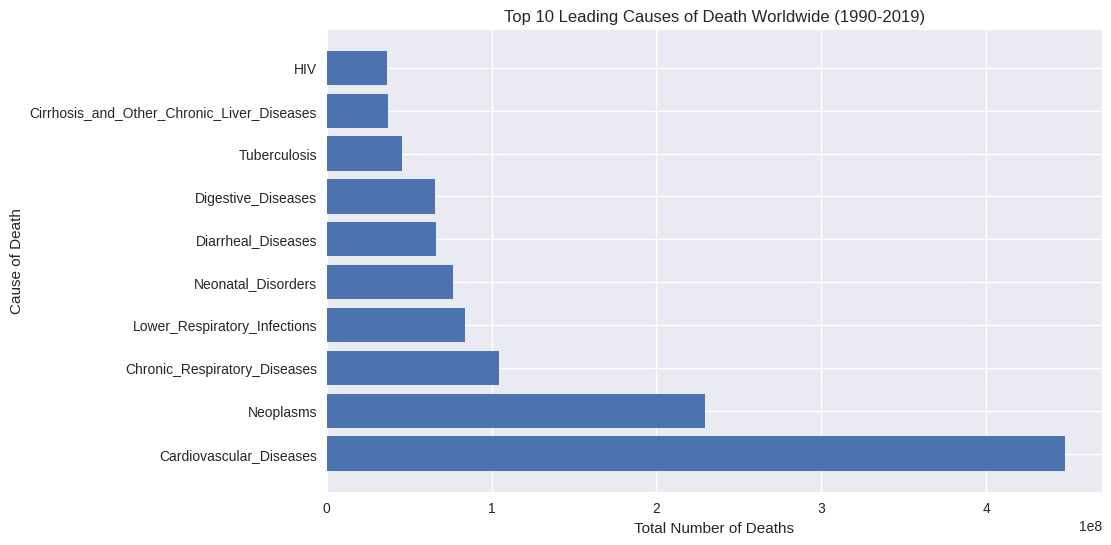

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(first_plot['Cause'], first_plot['Total'])
plt.xlabel('Total Number of Deaths')
plt.ylabel('Cause of Death')
plt.title('Top 10 Leading Causes of Death Worldwide (1990-2019)')
plt.show()

In [ ]:
column_sums = df_Main_data[columns_to_sum].sum().sort_values(ascending=False)
# Convert the Series to DataFrame before merging.
column_sums = column_sums.to_frame(name='Total')
column_sums = column_sums.reset_index().rename(columns={'index':'Cause'})
# Now you can merge
column_sums = column_sums.merge(df_Main_data.groupby(['Continent'])[columns_to_sum].sum().transpose(), left_on='Cause', right_index=True)

###Risk Factor

Manualy Grouping

In [ ]:
# List of diseases grouped by categories
grouped_diseases = {
    "Lifestyle-Related_Factors": [
        "Nutritional_Deficiencies",
        "Drug_Use_Disorders",
        "Alcohol_Use_Disorders",
        "Self_harm",
        "Protein_Energy_Malnutrition"
    ],
    "Environmental_and_External Causes": [
        "Drowning",
        "Interpersonal_Violence",
        "Exposure_to_Forces_of_Nature",
        "Conflict_and_Terrorism",
        "Road_Injuries",
        "Environmental_Heat_and_Cold_Exposure",
        "Poisonings",
        "Fire_Heat_and_Hot_Substances"
    ],
    "Infectious_Diseases": [
        "Meningitis",
        "Malaria",
        "HIV",
        "Tuberculosis",
        "Neonatal_Disorders",
        "Diarrheal_Diseases",
        "Acute_Hepatitis"
    ],
    "Chronic_Diseases": [
        "Alzheimers_Disease_and_Other_Dementias",
        "Parkinsons_Disease",
        "Cardiovascular_Diseases",
        "Lower_Respiratory_Infections",
        "Neoplasms",
        "Diabetes_Mellitus",
        "Chronic_Kidney_Disease",
        "Chronic_Respiratory_Diseases",
        "Cirrhosis_and_Other_Chronic_Liver_Diseases",
        "Digestive_Diseases"
    ]
}

# Convert dictionary to pandas DataFrame
df_grouped_diseases = pd.DataFrame([(category, disease) for category, diseases in grouped_diseases.items() for disease in diseases], columns=["Risk_Factor", "Cause"])

#df_grouped_diseases


In [ ]:
#Prefer only death count
df_Main_data_new = df_Main_data.drop(columns=['Total_Dead','Population'])
df_Main_data_new = df_Main_data_new.melt(id_vars=['Country', 'Code', 'Continent', 'Sub_region', 'Year'],
                                         var_name='Cause',
                                         value_name='Death_count')
df_Main_data_new = df_Main_data_new.join(df_grouped_diseases.set_index('Cause'), on='Cause')[['Country', 'Code', 'Continent', 'Sub_region', 'Year', 'Risk_Factor', 'Cause', 'Death_count']]

In [ ]:
top_10 = df_Main_data_new.groupby(['Continent','Risk_Factor']).sum().sort_values(by='Death_count', ascending=False)[['Death_count']]
top_10['Death_count(M)'] =top_10['Death_count']/1000000
top_10.reset_index(inplace=True)

In [ ]:
#print("\033[01mThis table shows top ten of Risk Factors by continent from 1990 to 2019.\033[0m")
#top_10.sort_values(by=['Death_count','Continent'], ascending=False)

####Adding percentage columns

###Transform2

In [ ]:
#Adjust unit
column_sums['Africa(%)'] = column_sums['Africa'] / 1000000
column_sums['Asia(%)'] = column_sums['Asia'] / 1000000
column_sums['Europe(%)'] = column_sums['Europe'] / 1000000
column_sums['Oceania(%)'] = column_sums['Oceania'] / 1000000
column_sums['Americas(%)'] = column_sums['Americas'] / 1000000
column_sums['Total death(M)'] = column_sums['Total'] / 1000000

In [ ]:
column_sums=column_sums.merge(df_grouped_diseases.set_index('Cause'), left_on='Cause', right_index=True)

In [ ]:
result_percen = column_sums.groupby(['Risk_Factor']).sum().sort_values(by='Total death(M)', ascending=False)[['Total death(M)','Africa(%)', 'Americas(%)', 'Asia(%)', 'Europe(%)', 'Oceania(%)']]
for continent in ['Africa(%)', 'Americas(%)', 'Asia(%)', 'Europe(%)', 'Oceania(%)']:
  result_percen[continent] = (result_percen[continent] / result_percen['Total death(M)']) * 100

In [ ]:
#print("\033[01m\033[31mThis table shows Risk Factors by continent (%) from 1990 to 2019.\033[0m")
#result_percen.round(2)

####**This table show Risk Factors by continent (%) from 1990 to 2019**

In [ ]:
result_percen.round(2)

,Total death(M),Africa(%),Americas(%),Asia(%),Europe(%),Oceania(%)
Risk_Factor,,,,,,
Chronic_Diseases,1066.30,10.08,13.42,55.33,20.63,0.54
Infectious_Diseases,264.96,46.09,3.75,48.81,1.18,0.17
Environmental_and_External Causes,72.13,17.57,15.53,55.59,11.01,0.31
Lifestyle-Related_Factors,57.01,22.12,11.51,52.08,13.97,0.32


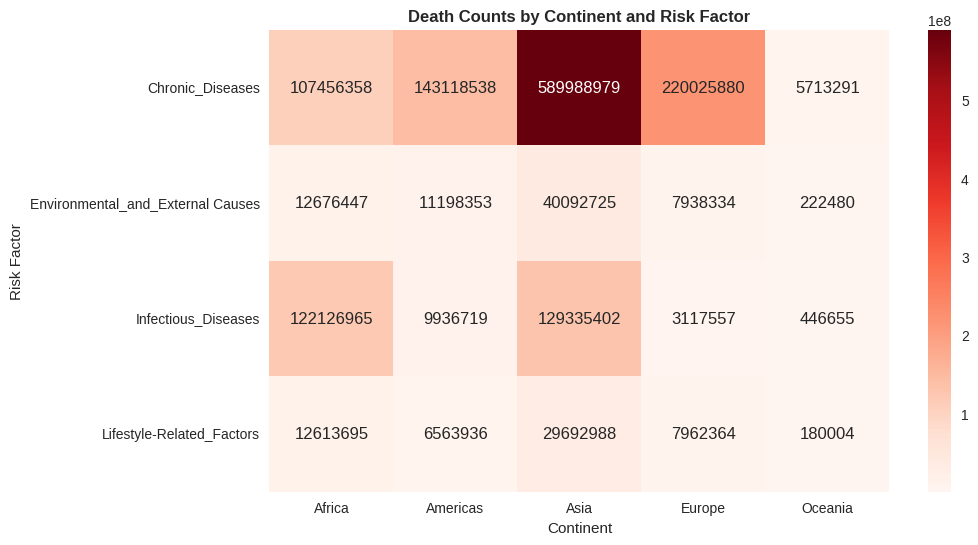

In [ ]:
# Create the heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
# unstack() is used to pivot the 'Risk_Factor' level of the index into columns.
# This operation transforms the Series into a DataFrame suitable for sns.heatmap.
sns.heatmap(df_Main_data_new.groupby(['Risk_Factor','Continent'])['Death_count'].sum().unstack(), annot=True, fmt=".0f", cmap='Reds')
plt.title('Death Counts by Continent and Risk Factor',fontweight='bold')
plt.xlabel('Continent')
plt.ylabel('Risk Factor')
plt.show()

กราฟนี้แสดงให้เห็นถึงปริมาณการเสียชีวิตจาก4ปัจจัยดสี่ยงหลักในแต่ละทวีป โดยจากการวิเคราะห์ข้อมูล พบว่าผู้คนในทุกทวีปมีอัตราการเสียชีวิตจากโรคเรื้อรังสูงที่สุด โดยทวีปเอเชียมีอัตราการเสียชีวิตที่สูงที่สุดเมื่อเปรียบเทียบกับทวีปอื่นๆ นอกจากนี้ ทวีปเอเชียยังเป็นอันดับหนึ่งในด้านปัจจัยเสี่ยงอื่นๆ เช่น โรคติดเชื้อ เสียชีวิตจากสิ่งแวดล้อมหรือปัจจัยภายนอก และเสียชีวิตสาเหตุจากไลฟ์สไตล์การใช้ชีวิต
ซึ่งสิ่งเหล่านี้เป็นสาเหตุหลักที่ส่งผลให้เกิดโรคต่างๆและนำไปสู่อัตราการเสียชีวิตที่สูงขึ้น

การวิเคราะห์นี้ชี้ให้เห็นถึงความจำเป็นในการให้ความสำคัญกับการดูแลสุขภาพและการป้องกันโรคในทวีปเอเชีย รวมถึงการสร้างความตระหนักรู้เกี่ยวกับปัจจัยเสี่ยงที่สามารถควบคุมได้ เพื่อช่วยลดอัตราการเสียชีวิตในอนาคต

####**Trends of Death count overyears**

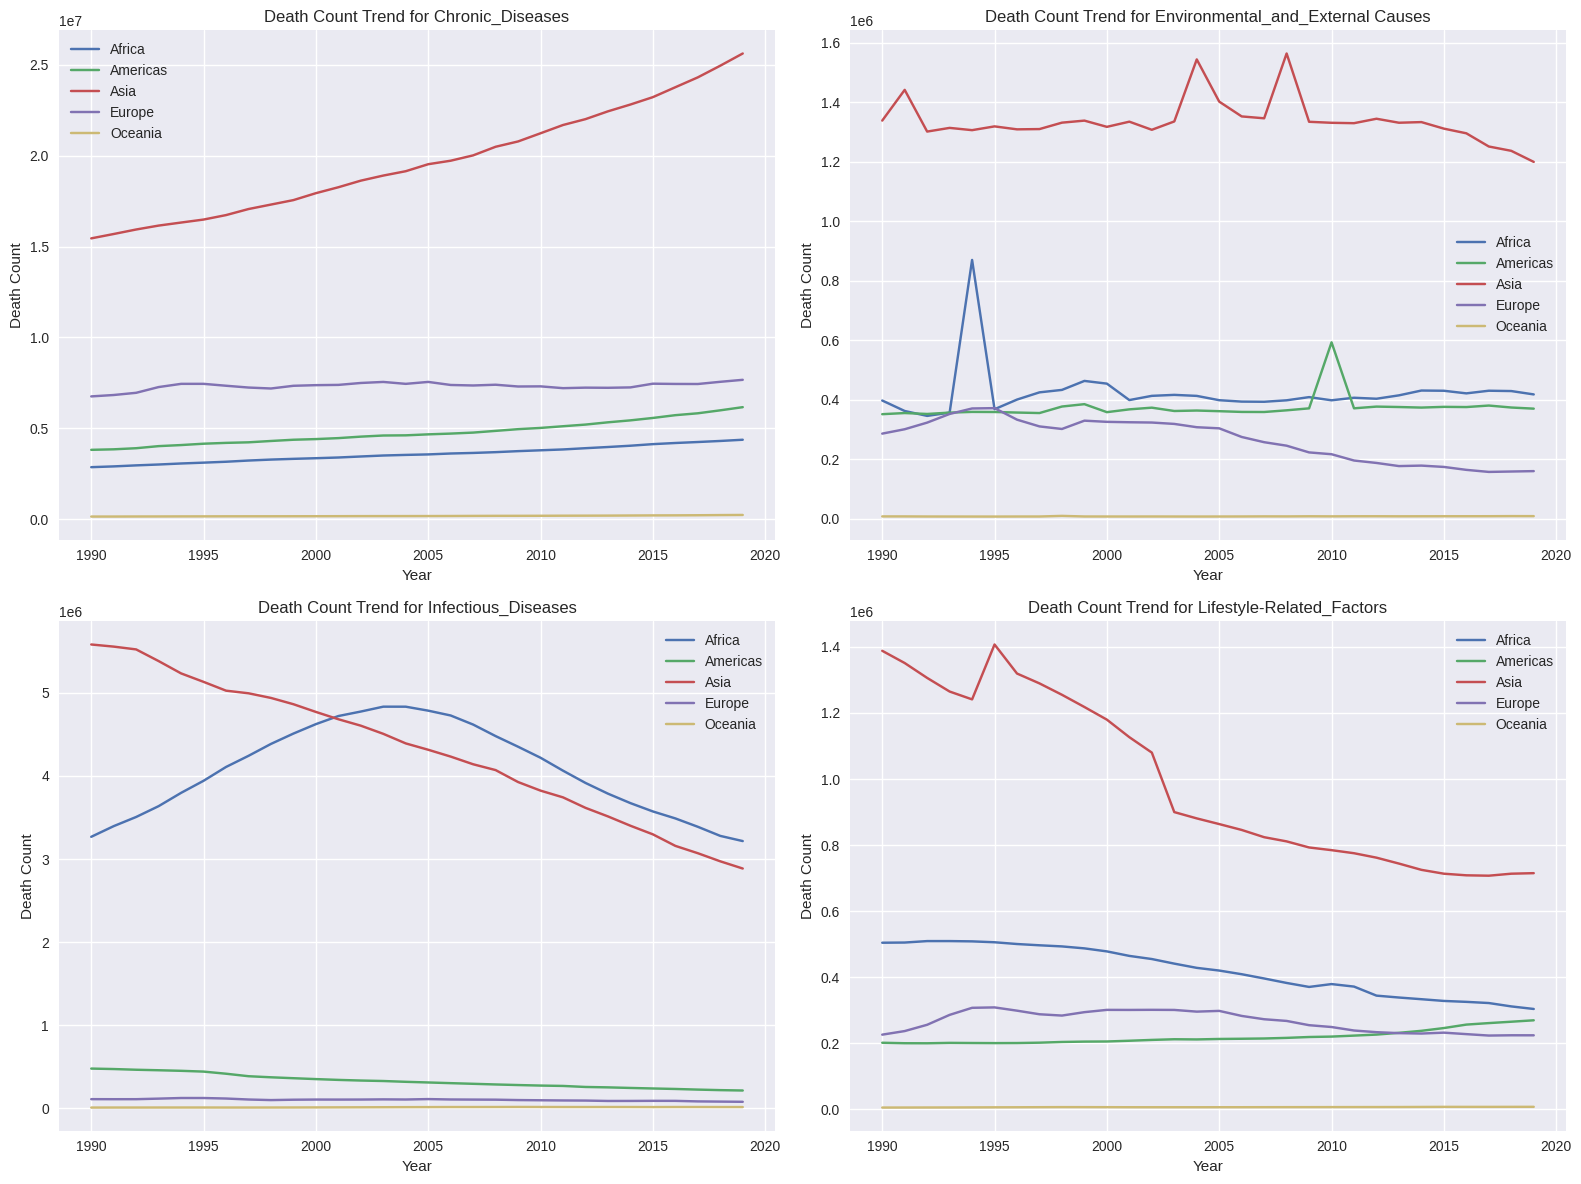

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Time series
# Group data by year, continent, and risk factor, then calculate the sum of death counts
df_grouped = df_Main_data_new.groupby(['Year', 'Continent', 'Risk_Factor'])['Death_count'].sum().reset_index()
# Loop through each risk factor and create a subplot for its time series
for i, risk_factor in enumerate(df_grouped['Risk_Factor'].unique()):
    # Fix: Adjust indexing to stay within the 2x2 grid
    row = i // 2
    col = i % 2
    ax = axes[row, col]  # Assign axes based on index within a 2x2 grid
    df_subset = df_grouped[df_grouped['Risk_Factor'] == risk_factor]
    for continent in df_subset['Continent'].unique():
        df_continent = df_subset[df_subset['Continent'] == continent]
        ax.plot(df_continent['Year'], df_continent['Death_count'], label=continent)
    ax.set_title(f'Death Count Trend for {risk_factor}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Death Count')
    ax.legend()

plt.tight_layout()
plt.show()

Combine Cause of death Column into Risk Factor

In [ ]:
# prompt: ใช้ Risk_Factor จากตาราง df_grouped_diseases เพื่อรวมColumnที่อยู่ในตาราง df_Main_data ด้วยดูจากชื่อColumnของdf_Main_dataที่ตรงกับ ค่าในColumn Cause แล้วรวมกันเป็นตารางใหม่

# Assuming df_Main_data and df_grouped_diseases are defined as in your provided code.

new_df = pd.DataFrame()  # Create an empty DataFrame to store the merged data
new_df['Code'] = df_Main_data['Code']
new_df['Year'] = df_Main_data['Year']
new_df['Continent'] = df_Main_data['Continent']
new_df['Sub_region'] = df_Main_data['Sub_region']

for risk_factor in df_grouped_diseases['Risk_Factor'].unique():
  causes_for_risk = df_grouped_diseases[df_grouped_diseases['Risk_Factor'] == risk_factor]['Cause'].tolist()
  #print(causes_for_risk)
  risk_factor_data = df_Main_data[causes_for_risk].sum(axis=1)  # Sum the columns corresponding to causes for this risk factor
  new_df[risk_factor] = risk_factor_data  # Add the summed column to the new DataFrame

new_df['Total_Dead'] = df_Main_data['Total_Dead']
new_df['Population'] = df_Main_data['Population']
# Print the resulting DataFrame
#new_df


Transform into ratio

In [ ]:
ratio = new_df.groupby(['Year','Continent']).sum().reset_index()
ratio.drop(columns=['Code','Sub_region'], inplace=True)
##Divide by population
for column in grouped_diseases.keys():
  ratio[column] = ratio[column] / ratio['Population']
#ratio

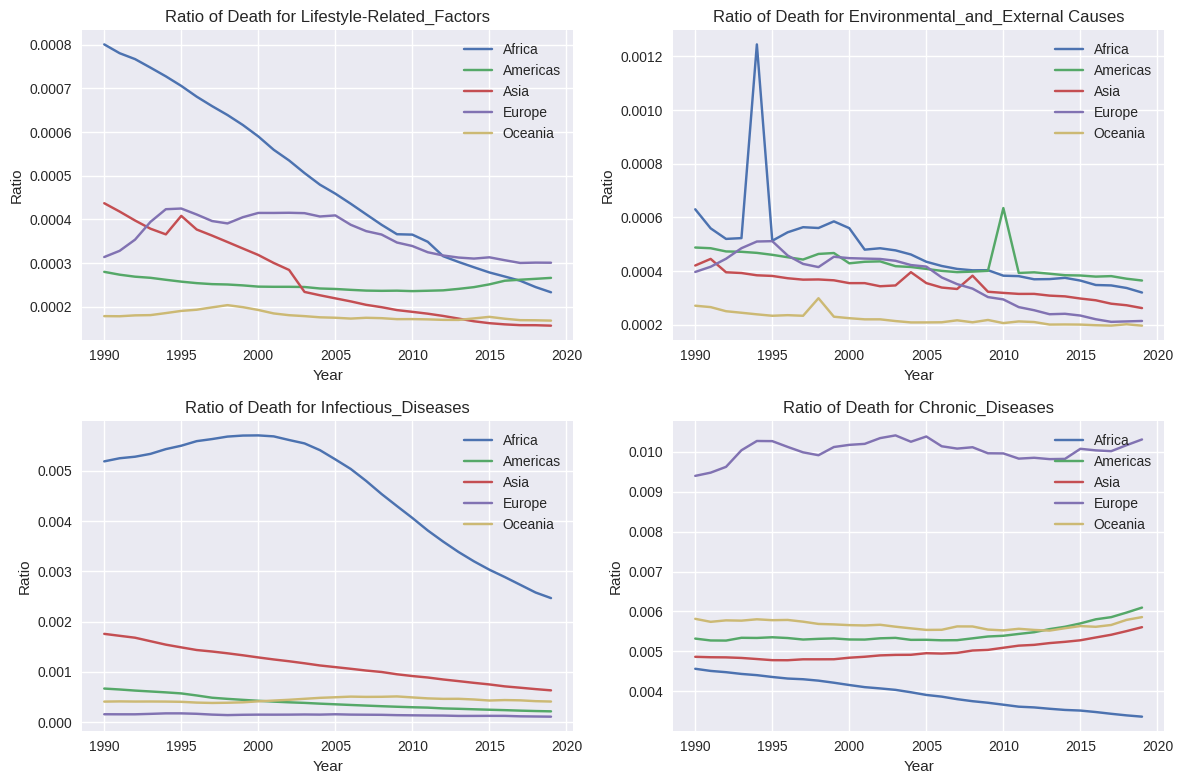

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'ratio' DataFrame is defined as in your provided code
# and contains columns like 'Year', 'Continent', 'Lifestyle-Related_Factors', etc.

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Loop through each risk factor and create a subplot for its time series
for i, risk_factor in enumerate(grouped_diseases.keys()):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    for continent in ratio['Continent'].unique():
        df_continent = ratio[ratio['Continent'] == continent]
        ax.plot(df_continent['Year'], df_continent[risk_factor], label=continent)
    ax.set_title(f'Ratio of Death for {risk_factor}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Ratio')
    ax.legend()

plt.tight_layout()
plt.show()

####**การเปลี่ยนแปลงปริมาณผูเสียชีวิตต่อประชากรในแต่ละทวีปตั้งแต่ปี1990 - 2019**

กราฟนี้แสดงอัตราส่วนของการเสียชีวิตต่อประชากร ซึ่งแสดงให้เห็นว่าเมื่อเปรียบเทียบกับประชากรแล้ว ทวีปเอเชียไม่ได้เป็นทวีปที่มีการเสียชีวิตสูงสุดในทุกปัจจัยเสี่ยง โดยพบว่าทวีปแอฟริกาและยุโรปมีอัตราการเสียชีวิตที่สูงกว่าในบางปัจจัยเสี่ยง อย่างไรก็ตาม การวิเคราะห์ในทวีปแอฟริกากลับพบว่ามีอัตราการเสียชีวิตลดลงอย่างมีนัยสำคัญ ซึ่งน่าสนใจมาก การลดลงนี้อาจเกิดจากความพยายามในการปรับปรุงระบบสุขภาพ การให้ความรู้เกี่ยวกับการป้องกันโรค และการเข้าถึงการรักษาพยาบาลที่ดีขึ้น

ผลการวิเคราะห์นี้ชี้ให้เห็นถึงการเปลี่ยนแปลงในพฤติกรรมและการเข้าถึงบริการด้านสุขภาพ ซึ่งเป็นสิ่งสำคัญที่ช่วยลดอัตราการเสียชีวิตในทวีปแอฟริกา และเปิดโอกาสในการศึกษาเพิ่มเติมเกี่ยวกับกลยุทธ์ที่สามารถนำไปใช้ในการพัฒนาสุขภาพในภูมิภาคอื่นๆ ได้อีกด้วย

Find slope of Risk Factor trends

In [ ]:
#ratio.loc[(ratio['Year'] == 1990) | (ratio['Year'] == 2019)]

In [ ]:
ratio_1990_2019 = ratio.loc[(ratio['Year'] == 1990) | (ratio['Year'] == 2019)]

# Group by Continent and calculate the slope for each risk factor
for risk_factor in grouped_diseases.keys():
  slope_by_continent = ratio_1990_2019.groupby('Continent').apply(lambda x: np.polyfit(x['Year'], x[risk_factor], 1)[0]).to_dict()

# Assuming 'ratio' DataFrame is defined as in your provided code.
ratio_1990_2019 = ratio.loc[(ratio['Year'] == 1990) | (ratio['Year'] == 2019)]

# Group by Continent and calculate the slope for each risk factor
for risk_factor in grouped_diseases.keys():
  slope_by_continent = ratio_1990_2019.groupby('Continent').apply(lambda x: np.polyfit(x['Year'], x[risk_factor], 1)[0]).to_dict()
  print(f"\033[01m\033[31mSlope of {risk_factor} by Continent:\033[0m")
  for continent, slope in slope_by_continent.items():
      print(f"  {continent}: {slope:}")
  print("\033[01m______________________________________________\033[0m\n")


Slope of Lifestyle-Related_Factors by Continent:
  Africa: -1.958727323181144e-05
  Americas: -4.7636298215293855e-07
  Asia: -9.674371651907292e-06
  Europe: -4.492648567769799e-07
  Oceania: -3.551315599043181e-07
______________________________________________

Slope of Environmental_and_External Causes by Continent:
  Africa: -1.0695633462923546e-05
  Americas: -4.239650756317739e-06
  Asia: -5.470627899105682e-06
  Europe: -6.296001231262002e-06
  Oceania: -2.56393996443035e-06
______________________________________________

Slope of Infectious_Diseases by Continent:
  Africa: -9.388650638950891e-05
  Americas: -1.564947757361615e-05
  Asia: -3.878980954356603e-05
  Europe: -1.655097813333013e-06
  Oceania: 4.858727112427704e-08
______________________________________________

Slope of Chronic_Diseases by Continent:
  Africa: -4.141534726765924e-05
  Americas: 2.6816478328234072e-05
  Asia: 2.5630820304253615e-05
  Europe: 3.149687851774917e-05
  Oceania: 1.4858158417317503e-06
____

<ipython-input-297-2b8418e7ae26>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  slope_by_continent = ratio_1990_2019.groupby('Continent').apply(lambda x: np.polyfit(x['Year'], x[risk_factor], 1)[0]).to_dict()
<ipython-input-297-2b8418e7ae26>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  slope_by_continent = ratio_1990_2019.groupby('Continent').apply(lambda x: np.polyfit(x['Year'], x[risk_factor], 1)[0]

####**South-Eastern Asia**

**การวิเคราะห์แนวโน้มการเสียชีวิตในภูมิภาคเอเชีย: ปัจจัยเสี่ยงและสาเหตุการเสียชีวิต**

การวิเคราะห์การเสียชีวิตในภูมิภาคเอเชียมีความสำคัญต่อการเข้าใจปัญหาสุขภาพที่มีผลกระทบต่อประชากรในภูมิภาคนี้อย่างลึกซึ้ง โดยภูมิภาคเอเชียซึ่งมีความหลากหลายทางวัฒนธรรมและสังคมยังคงเผชิญกับความท้าทายด้านสุขภาพที่แตกต่างกันไปตามแต่ละประเทศ ในการศึกษานี้ เราจะทำการวิเคราะห์อัตราการเสียชีวิตจากโรคเรื้อรัง ซึ่งอัตราการเปลี่ยนแปลงนั้นมีแนวโน้มเพิ่มขึ้นอย่างต่อเนื่อง
การวิเคราะห์ในครั้งนี้จะช่วยให้เราเข้าใจภาพรวมของสถานการณ์สุขภาพในภูมิภาคเอเชีย พร้อมทั้งเสนอแนวทางในการพัฒนานโยบายและกลยุทธ์ที่สามารถลดอัตราการเสียชีวิตจากโรคเรื้อรัง และยกระดับคุณภาพชีวิตของประชากรในอนาคตได้อย่างมีประสิทธิภาพ

In [ ]:
SEA = df_Main_data_new.loc[(df_Main_data_new['Risk_Factor'] == 'Chronic_Diseases')&(df_Main_data_new['Sub_region'] == 'South-Eastern Asia')].groupby(['Country','Cause'])['Death_count'].sum().unstack()

In [ ]:
print(f"Death causes from \033[31m\033[01mChronic disease risk factors.\033[0m")
SEA.sum().sort_values(ascending=False).reset_index().rename(columns={0: 'Total'})

Death causes from Chronic disease risk factors.


,Cause,Total
0,Cardiovascular_Diseases,31061773.0
1,Neoplasms,13230869.0
2,Digestive_Diseases,6653350.0
3,Lower_Respiratory_Infections,6624688.0
4,Chronic_Respiratory_Diseases,6571241.0
5,Cirrhosis_and_Other_Chronic_Liver_Diseases,4381871.0
6,Diabetes_Mellitus,4067490.0
7,Chronic_Kidney_Disease,2967261.0
8,Alzheimers_Disease_and_Other_Dementias,1648899.0
9,Parkinsons_Disease,411336.0


**10 อันดับโรคเรื้อรังที่ทำให้ผู้คนในภูมิภาคเอเชียตะวันออกเฉียงเหนือเสียชีวิตมากที่สุด**

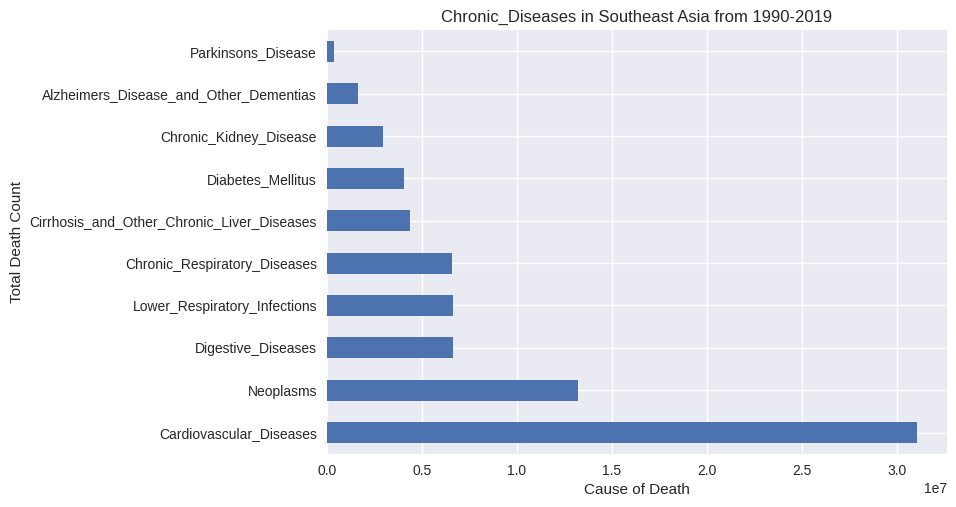

In [ ]:
SEA.sum().sort_values(ascending=False).plot(kind='barh')
plt.title('Chronic_Diseases in Southeast Asia from 1990-2019')
plt.xlabel('Cause of Death')
plt.ylabel('Total Death Count')
plt.show()

In [ ]:
SEA_trends = pd.merge(df_Main_data_new, df_population_melted, left_on=['Code', 'Year'], right_on=['Country Code', 'Year'], how='outer')

In [ ]:
SEA_trends = SEA_trends.loc[(SEA_trends['Sub_region'] == 'South-Eastern Asia')&((SEA_trends['Year'] == 1990)|(SEA_trends['Year'] == 2019))].reset_index()
SEA_trends['Death_Population_Ratio'] = SEA_trends['Death_count'] / SEA_trends['Population']

**การวิเคราะห์อัตราการเปลี่ยนแปลงจากอัตราส่วนผู้เสียชีวิตต่อจำนวนประชากรในภูมิภาคเอเชียตะวันออกเฉียงเหนือ**

In [ ]:
# prompt: find slope of each cause in from SEA_trends.loc[(SEA_trends['Risk_Factor'] == 'Chronic_Diseases')&((SEA_trends['Year'] == 1990)|(SEA_trends['Year'] == 2019))]

# Assuming SEA_trends DataFrame is defined as in your provided code.
SEA_trends_chronic_1990_2019 = SEA_trends.loc[(SEA_trends['Risk_Factor'] == 'Chronic_Diseases') & ((SEA_trends['Year'] == 1990) | (SEA_trends['Year'] == 2019))]
print("\033[01m\033[31mChanging rate of Death causes from chronic disease risk factors in SEA\033[0m\n")
# Group by Cause and calculate the slope for each cause
for cause in SEA_trends_chronic_1990_2019['Cause'].unique():
  SEA_trends_cause = SEA_trends_chronic_1990_2019[SEA_trends_chronic_1990_2019['Cause'] == cause]
  if len(SEA_trends_cause) >= 2:  # Ensure we have data for both 1990 and 2019
    slope = np.polyfit(SEA_trends_cause['Year'], SEA_trends_cause['Death_Population_Ratio'], 1)[0]
    print(f"{cause}: {slope}")

Changing rate of Death causes from chronic disease risk factors in SEA

Alzheimers_Disease_and_Other_Dementias: 2.531222640816224e-06
Parkinsons_Disease: 5.610861205072793e-07
Cardiovascular_Diseases: 1.4562434004328397e-05
Lower_Respiratory_Infections: -1.8908377938558168e-05
Neoplasms: 1.0047699589140254e-05
Diabetes_Mellitus: 2.21163440883402e-06
Chronic_Kidney_Disease: 2.1672724790911164e-06
Chronic_Respiratory_Diseases: -1.897921919782548e-06
Cirrhosis_and_Other_Chronic_Liver_Diseases: 4.470115520672339e-07
Digestive_Diseases: -4.4090568496890946e-07


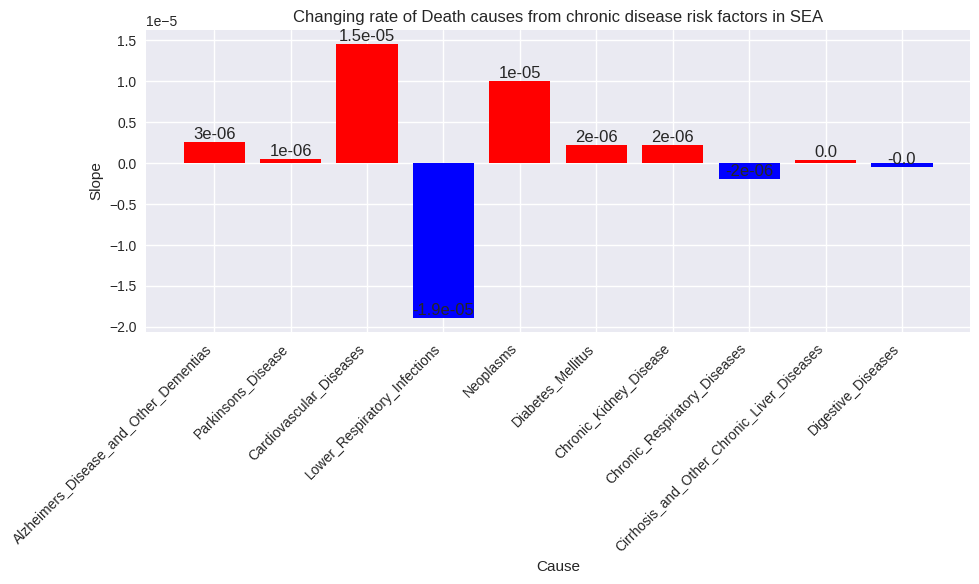

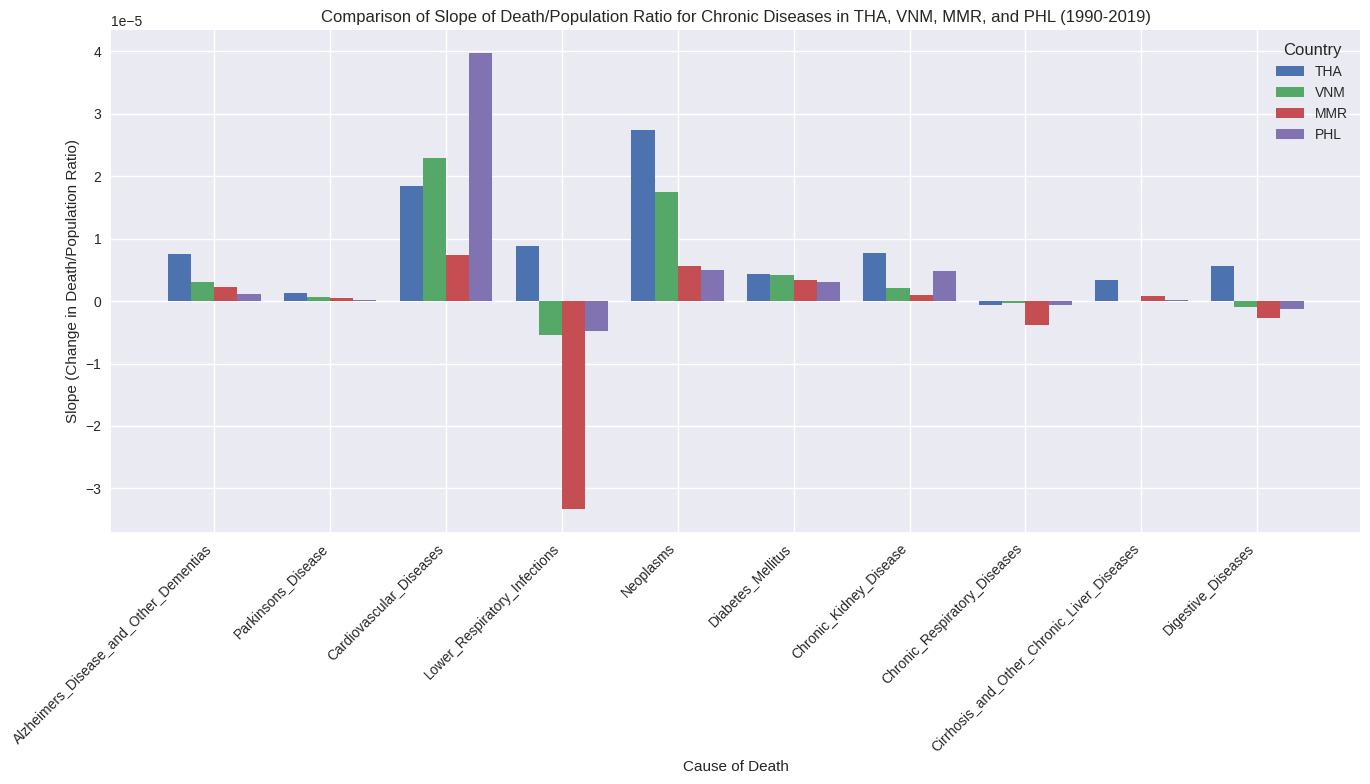

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming SEA_trends DataFrame is defined as in your provided code.
SEA_trends_chronic_1990_2019 = SEA_trends.loc[
    (SEA_trends["Risk_Factor"] == "Chronic_Diseases")
    & ((SEA_trends["Year"] == 1990) | (SEA_trends["Year"] == 2019))
]

causes = SEA_trends_chronic_1990_2019["Cause"].unique()
slopes = []

for cause in causes:
    SEA_trends_cause = SEA_trends_chronic_1990_2019[
        SEA_trends_chronic_1990_2019["Cause"] == cause
    ]
    if len(SEA_trends_cause) >= 2:  # Ensure we have data for both 1990 and 2019
        slope = np.polyfit(
            SEA_trends_cause["Year"], SEA_trends_cause["Death_Population_Ratio"], 1
        )[0]
        slopes.append(slope)
    else:
        slopes.append(np.nan)  # Append NaN if data is missing for a cause
# Create a bar plot of the slopes
plt.figure(figsize=(10, 6))
colors = ['red' if slope > 0 else 'blue' for slope in slopes] # Assign colors based on slope values
bars = plt.bar(causes, slopes, color=colors)  # Store the bar objects

# Add values on top of the bars
for bar, slope in zip(bars, slopes):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(slope, 6), ha='center', va='bottom')

#plt.bar(causes, slopes, color=colors)
plt.xlabel("Cause")
plt.ylabel("Slope")
plt.title("Changing rate of Death causes from chronic disease risk factors in SEA")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate slopes for each cause in a DataFrame
def calculate_slopes(df):
    """Calculates the slopes for each cause in a DataFrame."""
    slopes = {}
    for cause in df['Cause'].unique():
        df_cause = df[df['Cause'] == cause]
        if len(df_cause) >= 2:  # Ensure there are at least 2 data points to fit the line
            slope = np.polyfit(df_cause['Year'], df_cause['Death_Population_Ratio'], 1)[0]
            slopes[cause] = slope
    return slopes

# Calculate slopes for each country
tha_slopes = calculate_slopes(SEA_trends_chronic_THA_1990_2019)
vnm_slopes = calculate_slopes(SEA_trends_chronic_VNM_1990_2019)
mmr_slopes = calculate_slopes(SEA_trends_chronic_MMR_1990_2019)
phl_slopes = calculate_slopes(SEA_trends_chronic_PHL_1990_2019)

# Ensure all countries have the same causes for a fair comparison (adjust if necessary)
causes = list(tha_slopes.keys())

# Create a bar plot comparing the slopes for THA, VNM, MMR, PHL
plt.figure(figsize=(14, 8))

width = 0.2  # Set the width for each bar
x = np.arange(len(causes))  # Define the positions for the causes on the x-axis

# Plot the bar for each country with different offsets
plt.bar(x - 1.5 * width, [tha_slopes[cause] for cause in causes], width, label='THA')
plt.bar(x - 0.5 * width, [vnm_slopes[cause] for cause in causes], width, label='VNM')
plt.bar(x + 0.5 * width, [mmr_slopes[cause] for cause in causes], width, label='MMR')
plt.bar(x + 1.5 * width, [phl_slopes[cause] for cause in causes], width, label='PHL')

# Customize the x-axis and labels
plt.xticks(x, causes, rotation=45, ha='right')
plt.xlabel('Cause of Death')
plt.ylabel('Slope (Change in Death/Population Ratio)')
plt.title('Comparison of Slope of Death/Population Ratio for Chronic Diseases in THA, VNM, MMR, and PHL (1990-2019)')
plt.legend(title='Country')
plt.grid(True, axis='y')  # Add gridlines only for the y-axis

plt.tight_layout()
plt.show()

####**การวิเคราะห์แนวโน้มการเปลี่ยนแปลงอัตราการเสียชีวิตในทวีปเอเชียและการเปรียบเทียบกับประเทศไทย**

กราฟด้านบนแสดงให้เห็นภาพรวมของการเปลี่ยนแปลงอัตราการเสียชีวิตในทวีปเอเชียการวิเคราะห์ในครั้งนี้มุ่งเน้นไปที่การเปรียบเทียบระหว่างประเทศไทยและประเทศอื่น ๆ ที่มีปัจจัยทางสังคม เศรษฐกิจ และวัฒนธรรมใกล้เคียงกัน เช่น เวียดนามและฟิลิปปินส์ และเมียนมาร์

In [ ]:
# prompt: Find slope of each cause in from SEA_trends.loc[(SEA_trends['Risk_Factor'] == 'Chronic_Diseases')&(SEA_trends['Code']=='THA')&((SEA_trends['Year'] == 1990)|(SEA_trends['Year'] == 2019))]
# prompt: Find slope of each cause in from SEA_trends.loc[(SEA_trends['Risk_Factor'] == 'Chronic_Diseases')&(SEA_trends['Code']=='THA')&((SEA_trends['Year'] == 1990)|(SEA_trends['Year'] == 2019))]

# Assuming SEA_trends DataFrame is defined as in your provided code.
SEA_trends_chronic_THA_1990_2019 = SEA_trends.loc[(SEA_trends['Risk_Factor'] == 'Chronic_Diseases') & (SEA_trends['Code'] == 'THA') & ((SEA_trends['Year'] == 1990) | (SEA_trends['Year'] == 2019))]

print(f"\033[31m\nSlope of Death causes from chronic disease risk factors in \033[01mTHA\033[0m\n")

# Group by Cause and calculate the slope for each cause
for cause in SEA_trends_chronic_THA_1990_2019['Cause'].unique():
  SEA_trends_cause = SEA_trends_chronic_THA_1990_2019[SEA_trends_chronic_THA_1990_2019['Cause'] == cause]
  if len(SEA_trends_cause) >= 2:  # Ensure we have data for both 1990 and 2019
    slope = np.polyfit(SEA_trends_cause['Year'], SEA_trends_cause['Death_Population_Ratio'], 1)[0]
    print(f"{cause}: {slope}")
print(f"\033[01m\033[31m_________________________________________________\033[0m\n")
# Assuming SEA_trends DataFrame is defined as in your provided code.
SEA_trends_chronic_VNM_1990_2019 = SEA_trends.loc[(SEA_trends['Risk_Factor'] == 'Chronic_Diseases') & (SEA_trends['Code'] == 'VNM') & ((SEA_trends['Year'] == 1990) | (SEA_trends['Year'] == 2019))]

print(f"\033[31m\nSlope of Death causes from chronic disease risk factors in \033[01mVNM\033[0m\n")

# Group by Cause and calculate the slope for each cause
for cause in SEA_trends_chronic_VNM_1990_2019['Cause'].unique():
  SEA_trends_cause = SEA_trends_chronic_VNM_1990_2019[SEA_trends_chronic_VNM_1990_2019['Cause'] == cause]
  if len(SEA_trends_cause) >= 2:  # Ensure we have data for both 1990 and 2019
    slope = np.polyfit(SEA_trends_cause['Year'], SEA_trends_cause['Death_Population_Ratio'], 1)[0]
    print(f"{cause}: {slope}")
print(f"\033[01m\033[31m_________________________________________________\033[0m\n")
# Assuming SEA_trends DataFrame is defined as in your provided code.
SEA_trends_chronic_MMR_1990_2019 = SEA_trends.loc[(SEA_trends['Risk_Factor'] == 'Chronic_Diseases') & (SEA_trends['Code'] == 'MMR') & ((SEA_trends['Year'] == 1990) | (SEA_trends['Year'] == 2019))]

print(f"\033[31m\nSlope of Death causes from chronic disease risk factors in \033[01mMMR\033[0m\n")

# Group by Cause and calculate the slope for each cause
for cause in SEA_trends_chronic_MMR_1990_2019['Cause'].unique():
  SEA_trends_cause = SEA_trends_chronic_MMR_1990_2019[SEA_trends_chronic_MMR_1990_2019['Cause'] == cause]
  if len(SEA_trends_cause) >= 2:  # Ensure we have data for both 1990 and 2019
    slope = np.polyfit(SEA_trends_cause['Year'], SEA_trends_cause['Death_Population_Ratio'], 1)[0]
    print(f"{cause}: {slope}")

print(f"\033[01m\033[31m_________________________________________________\033[0m\n")
# Assuming SEA_trends DataFrame is defined as in your provided code.
SEA_trends_chronic_PHL_1990_2019 = SEA_trends.loc[(SEA_trends['Risk_Factor'] == 'Chronic_Diseases') & (SEA_trends['Code'] == 'PHL') & ((SEA_trends['Year'] == 1990) | (SEA_trends['Year'] == 2019))]

print(f"\033[31m\nSlope of Death causes from chronic disease risk factors in \033[01mPHL\033[0m\n")

# Group by Cause and calculate the slope for each cause
for cause in SEA_trends_chronic_PHL_1990_2019['Cause'].unique():
  SEA_trends_cause = SEA_trends_chronic_PHL_1990_2019[SEA_trends_chronic_PHL_1990_2019['Cause'] == cause]
  if len(SEA_trends_cause) >= 2:  # Ensure we have data for both 1990 and 2019
    slope = np.polyfit(SEA_trends_cause['Year'], SEA_trends_cause['Death_Population_Ratio'], 1)[0]
    print(f"{cause}: {slope}")


Slope of Death causes from chronic disease risk factors in THA

Alzheimers_Disease_and_Other_Dementias: 7.52957466903095e-06
Parkinsons_Disease: 1.2784433024104426e-06
Cardiovascular_Diseases: 1.8348468776633923e-05
Lower_Respiratory_Infections: 8.820302113446309e-06
Neoplasms: 2.7460643472037347e-05
Diabetes_Mellitus: 4.299560800528264e-06
Chronic_Kidney_Disease: 7.637487333865589e-06
Chronic_Respiratory_Diseases: -5.726559451885765e-07
Cirrhosis_and_Other_Chronic_Liver_Diseases: 3.3397965723986366e-06
Digestive_Diseases: 5.594504251456752e-06
_________________________________________________


Slope of Death causes from chronic disease risk factors in VNM

Alzheimers_Disease_and_Other_Dementias: 3.018184508504391e-06
Parkinsons_Disease: 6.942554981115699e-07
Cardiovascular_Diseases: 2.2859401591431383e-05
Lower_Respiratory_Infections: -5.494572704000524e-06
Neoplasms: 1.7500770270727564e-05
Diabetes_Mellitus: 4.237761624576514e-06
Chronic_Kidney_Disease: 2.0871341279444143e-06
Chron